SMC8 - Test Resuts

In [37]:
!pip install matplotlib pandas numpy csv

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement csv (from versions: none)
ERROR: No matching distribution found for csv


In [38]:
import matplotlib.pyplot as plt 
import matplotlib.pyplot as pyplot
import pandas as pd
import numpy as np
import csv
from matplotlib.cm import get_cmap



In [16]:
# upload files
csv_file_path = "Aftertest _Questionnaire.csv"
csv_file_path1 = "Beforetest_Questionnaire.csv"
csv_file_path2 = "followup-test.csv"
data_afterquestionnaire = pd.read_csv(csv_file_path)
data_beforequestionnaire = pd.read_csv(csv_file_path1)
data_followup = pd.read_csv(csv_file_path2)


**5 Point Likert Scale - Post Questionnaire**

C:\Users\where\AppData\Local\Temp\ipykernel_23996\451278125.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


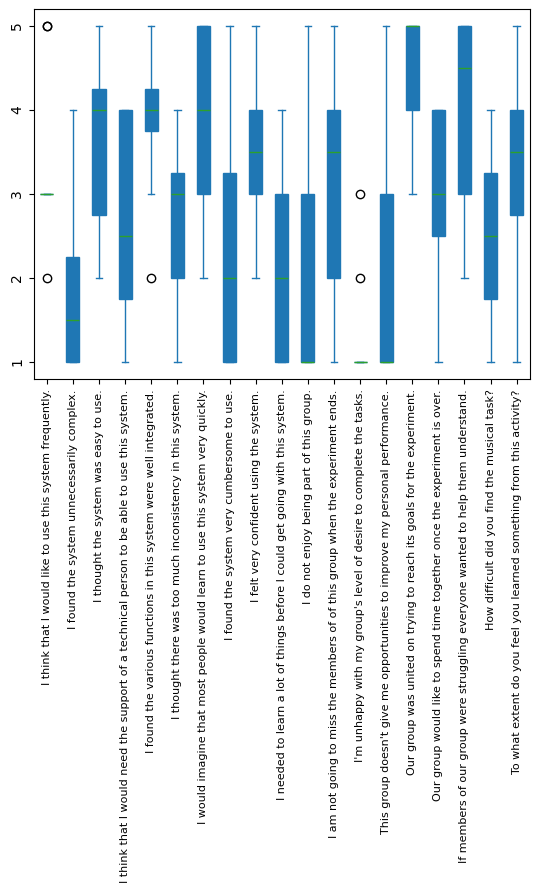

In [17]:
data_likert = data_afterquestionnaire.replace({"Strongly Disagree": 1, "Disagree": 2, "Neutral": 3, "Agree": 4, "Strongly Agree": 5})

# drops collums that are not needed

data_likert = data_likert.drop(columns=[data_likert.columns[1]])
data_likert = data_likert.drop(columns=[data_likert.columns[1]])
data_likert = data_likert.drop(columns=[data_likert.columns[20]])


# plotting options
ax = data_likert.plot.box(patch_artist=True) 

# Create a colormap
cmap = plt.get_cmap('tab20')
colors = [cmap(i) for i in np.linspace(0, 1, len(data_likert.columns))]

# Assign colors to each box
for patch, color in zip(ax.artists, colors):
    patch.set_facecolor(color)
ax.set_yticks([1, 2, 3, 4, 5])
plt.xticks(rotation=90, fontsize=8)
plt.yticks(rotation=90)
plt.tight_layout()
plt.show()

**Post Questionnaire - OMS Score**

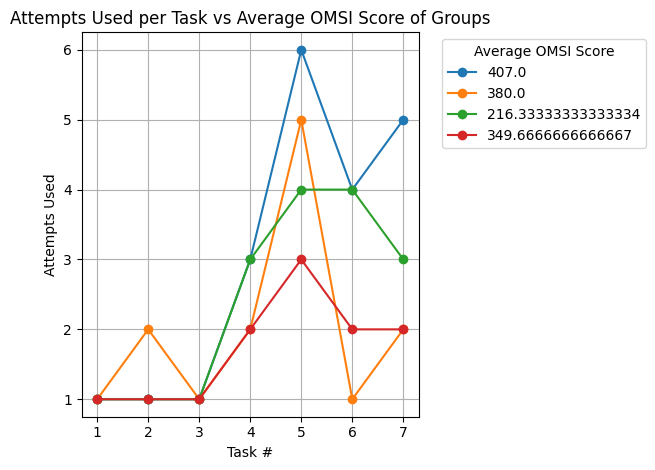

In [31]:
x = [1, 2, 3, 4, 5, 6, 7]

# Get unique values in column 2 (group identifiers)
group_ids = data_beforequestionnaire.iloc[:, 3].unique()
data_beforequestionnaire.loc[data_beforequestionnaire['Task 5'] == 0, 'Task 5'] = 6

# Loop through each group
for group in group_ids:
    # Filter rows matching this group
    group_rows = data_beforequestionnaire[data_beforequestionnaire.iloc[:, 3] == group]
    
    # Get the average of columns 8 to 14 across all matching rows
    group_values = group_rows.iloc[:, 8:15].apply(pd.to_numeric, errors='coerce').mean()
    
    # Get the value from column 7 for the current group (e.g., name or label for this ID)
    group_label = group_rows.iloc[:, 7].mean()  # You can adjust the indexing if needed

    # Plot the average line for this group with the label from column 7
    plt.plot(x, group_values, marker='o', label=f'{group_label}')

# Add labels, legend, and grid
plt.xlabel("Task #")
plt.ylabel("Attempts Used")
plt.title("Attempts Used per Task vs Average OMSI Score of Groups")
plt.legend(title="Average OMSI Score", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

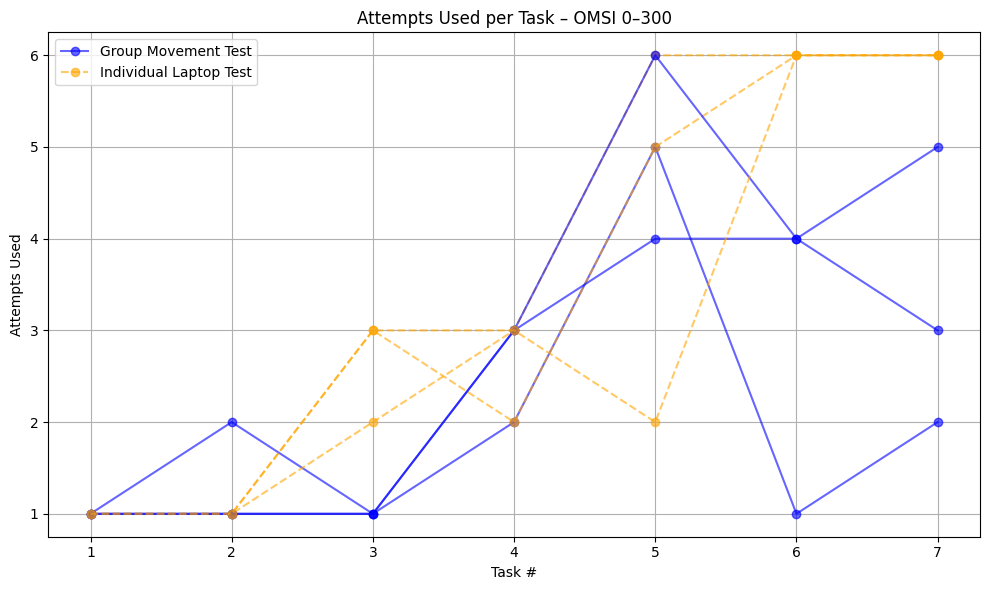

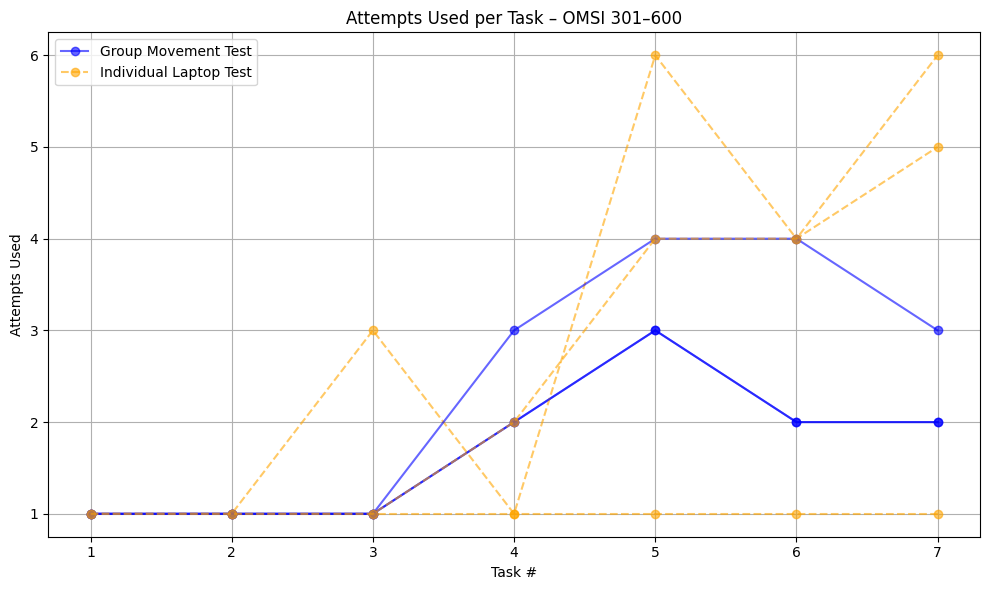

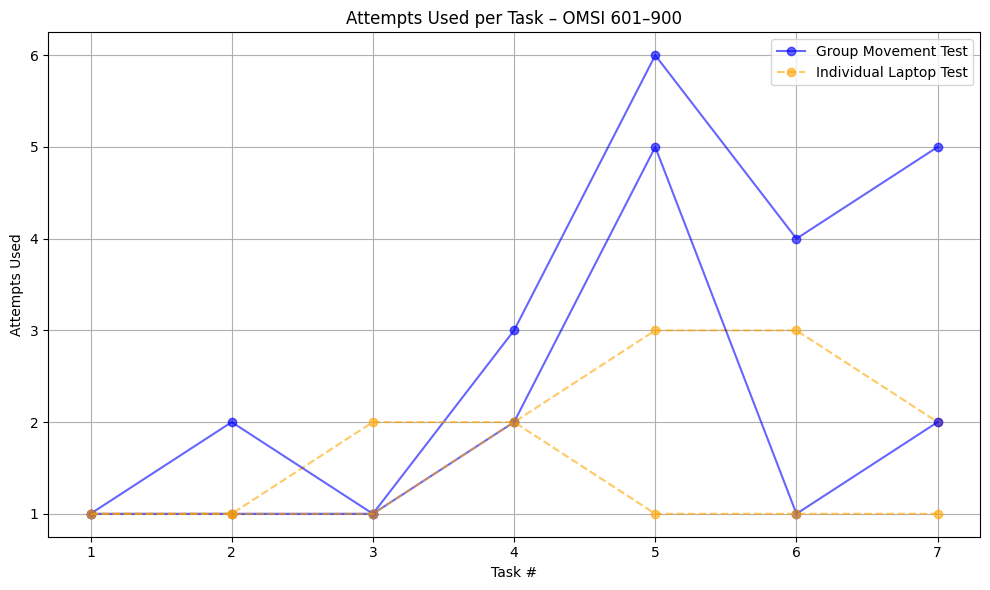

In [32]:
# Define the task x-axis
x = [1, 2, 3, 4, 5, 6, 7]

# Assign OMSI categories
low_group = []
mid_group = []
high_group = []

subject_ids = data_followup.iloc[:, 0].unique()

# Categorize subjects based on their OMSI scores
for subject in subject_ids:
    # Get the subject's OMSI score (assuming column 7 in data_followup)
    subject_score = data_beforequestionnaire[data_beforequestionnaire.iloc[:, 2] == subject].iloc[0, 7]

    if 0 <= subject_score <= 300:
        low_group.append(subject)
    elif 301 <= subject_score <= 600:
        mid_group.append(subject)
    elif 601 <= subject_score <= 900:
        high_group.append(subject)

# Helper function to plot a group of subjects
def plot_group(subject_group, group_name):
    plt.figure(figsize=(10, 6))
    
    for subject in subject_group:
        subject_before_rows = data_beforequestionnaire[data_beforequestionnaire.iloc[:, 2] == subject]
        subject_followup_rows = data_followup[data_followup.iloc[:, 0] == subject]

        for _, row in subject_before_rows.iterrows():
            before_values = row.iloc[8:15].to_numpy().flatten()
            plt.plot(x, before_values, marker='o', linestyle='-', color='blue', alpha=0.6, label='Group Movement Test')

        for _, row in subject_followup_rows.iterrows():
            followup_values = row.iloc[1:8].to_numpy().flatten()
            plt.plot(x, followup_values, marker='o', linestyle='--', color='orange', alpha=0.6, label='Individual Laptop Test')

    plt.xlabel("Task #")
    plt.ylabel("Attempts Used")
    plt.title(f"Attempts Used per Task – OMSI {group_name}")
    # Avoid duplicated labels in the legend
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot each group
plot_group(low_group, "0–300")
plot_group(mid_group, "301–600")
plot_group(high_group, "601–900")


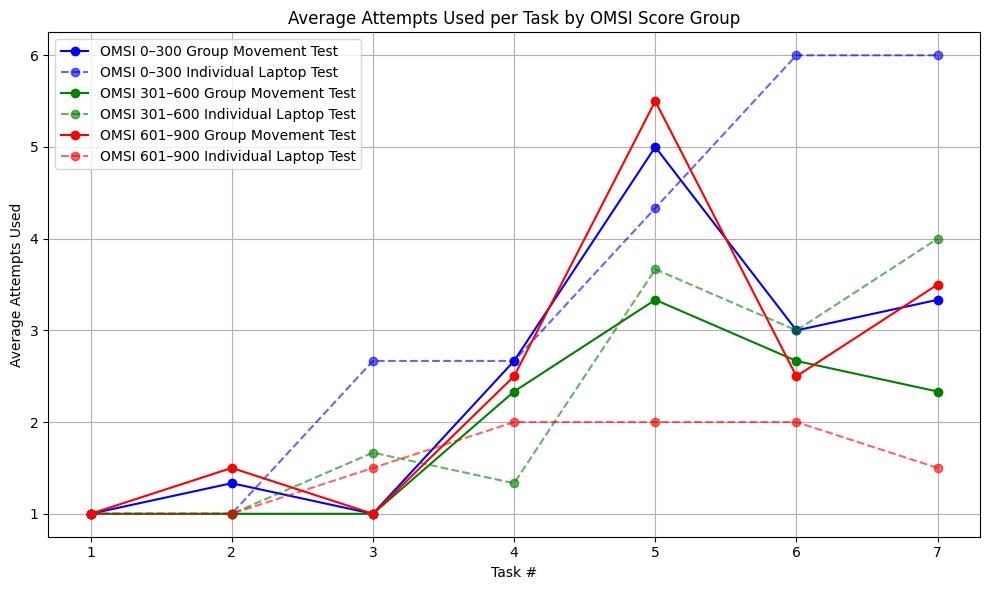

In [35]:
x = [1, 2, 3, 4, 5, 6, 7]

# Initialize groups
low_before = []
mid_before = []
high_before = []

low_followup = []
mid_followup = []
high_followup = []

subject_ids = data_followup.iloc[:, 0].unique()
# Loop through each subject and group their task data
for subject in subject_ids:
    subject_followup_rows = data_followup[data_followup.iloc[:, 0] == subject]
    subject_score = data_beforequestionnaire[data_beforequestionnaire.iloc[:, 2] == subject].iloc[0, 7]

    subject_before_rows = data_beforequestionnaire[data_beforequestionnaire.iloc[:, 2] == subject]

    # Collect "before" task data (columns 8 to 14)
    before_values = subject_before_rows.iloc[:, 8:15].to_numpy()

    # Collect "follow-up" task data (columns 1 to 7)
    followup_values = subject_followup_rows.iloc[:, 1:8].to_numpy()

    # Add to the appropriate group
    if 0 <= subject_score <= 300:
        low_before.append(before_values)
        low_followup.append(followup_values)
    elif 301 <= subject_score <= 600:
        mid_before.append(before_values)
        mid_followup.append(followup_values)
    elif 601 <= subject_score <= 900:
        high_before.append(before_values)
        high_followup.append(followup_values)

# Helper function to compute group average
def compute_average(group_data):
    if len(group_data) == 0:
        return None
    combined = np.vstack(group_data)  # Stack all rows
    return np.mean(combined, axis=0)  # Mean per task

# Compute group averages
low_before_avg = compute_average(low_before)
low_followup_avg = compute_average(low_followup)

mid_before_avg = compute_average(mid_before)
mid_followup_avg = compute_average(mid_followup)

high_before_avg = compute_average(high_before)
high_followup_avg = compute_average(high_followup)

# Plot the averaged results
plt.figure(figsize=(10, 6))

if low_before_avg is not None:
    plt.plot(x, low_before_avg, marker='o', linestyle='-', label='OMSI 0–300 Group Movement Test', color='blue')
    plt.plot(x, low_followup_avg, marker='o', linestyle='--', label='OMSI 0–300 Individual Laptop Test', color='blue', alpha=0.6)

if mid_before_avg is not None:
    plt.plot(x, mid_before_avg, marker='o', linestyle='-', label='OMSI 301–600 Group Movement Test', color='green')
    plt.plot(x, mid_followup_avg, marker='o', linestyle='--', label='OMSI 301–600 Individual Laptop Test', color='green', alpha=0.6)

if high_before_avg is not None:
    plt.plot(x, high_before_avg, marker='o', linestyle='-', label='OMSI 601–900 Group Movement Test', color='red')
    plt.plot(x, high_followup_avg, marker='o', linestyle='--', label='OMSI 601–900 Individual Laptop Test', color='red', alpha=0.6)

# Plot decorations
plt.xlabel("Task #")
plt.ylabel("Average Attempts Used")
plt.title("Average Attempts Used per Task by OMSI Score Group")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


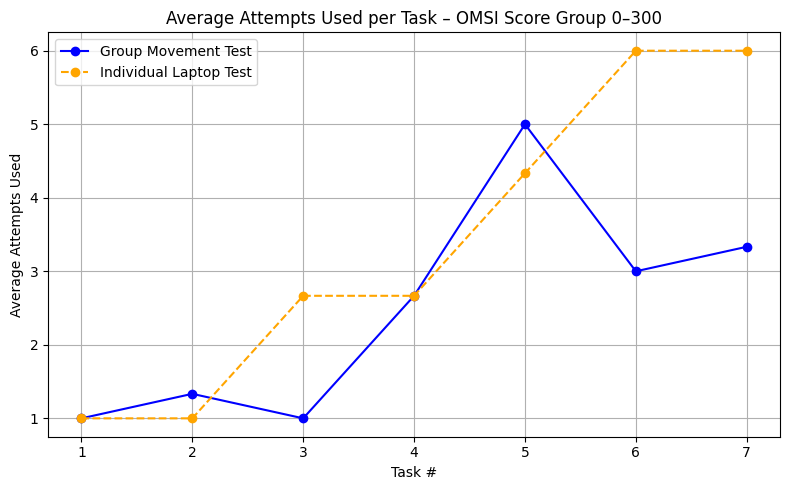

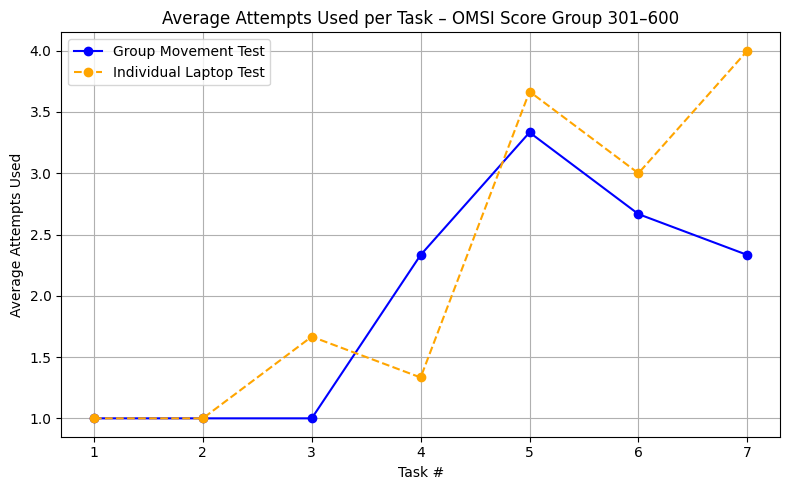

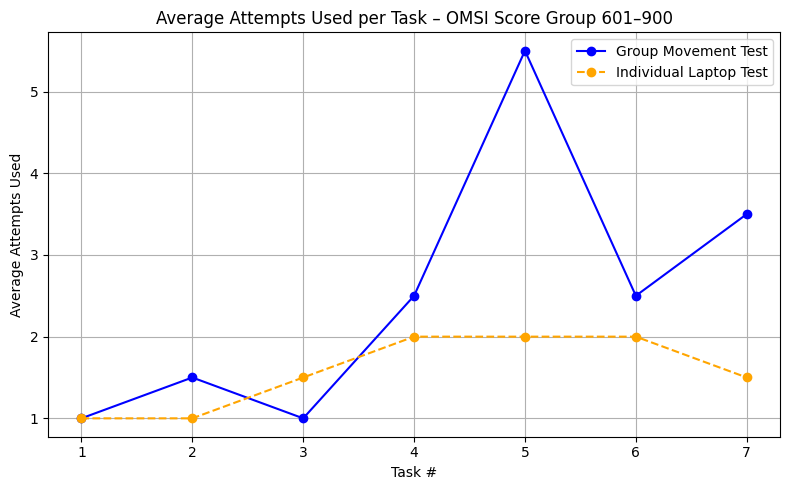

In [36]:
import numpy as np
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5, 6, 7]

# Containers for each group
groups = {
    "0–300": {"before": [], "followup": []},
    "301–600": {"before": [], "followup": []},
    "601–900": {"before": [], "followup": []}
}

subject_ids = data_followup.iloc[:, 0].unique()

# Group subjects and collect task data
for subject in subject_ids:
    subject_followup_rows = data_followup[data_followup.iloc[:, 0] == subject]
    subject_score = data_beforequestionnaire[data_beforequestionnaire.iloc[:, 2] == subject].iloc[0, 7]
    subject_before_rows = data_beforequestionnaire[data_beforequestionnaire.iloc[:, 2] == subject]

    before_values = subject_before_rows.iloc[:, 8:15].to_numpy()
    followup_values = subject_followup_rows.iloc[:, 1:8].to_numpy()

    if 0 <= subject_score <= 300:
        groups["0–300"]["before"].append(before_values)
        groups["0–300"]["followup"].append(followup_values)
    elif 301 <= subject_score <= 600:
        groups["301–600"]["before"].append(before_values)
        groups["301–600"]["followup"].append(followup_values)
    elif 601 <= subject_score <= 900:
        groups["601–900"]["before"].append(before_values)
        groups["601–900"]["followup"].append(followup_values)

# Helper function to compute average per task
def compute_average(data_list):
    if not data_list:
        return None
    all_data = np.vstack(data_list)
    return np.mean(all_data, axis=0)

# Plot each group in its own figure
for group_label, data in groups.items():
    before_avg = compute_average(data["before"])
    followup_avg = compute_average(data["followup"])

    if before_avg is None or followup_avg is None:
        continue  # Skip empty groups

    plt.figure(figsize=(8, 5))
    plt.plot(x, before_avg, marker='o', linestyle='-', label='Group Movement Test', color='blue')
    plt.plot(x, followup_avg, marker='o', linestyle='--', label='Individual Laptop Test', color='orange')

    plt.xlabel("Task #")
    plt.ylabel("Average Attempts Used")
    plt.title(f"Average Attempts Used per Task – OMSI Score Group {group_label}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


C:\Users\where\AppData\Local\Temp\ipykernel_23996\3472918561.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = cm.get_cmap("tab20", num_colors)


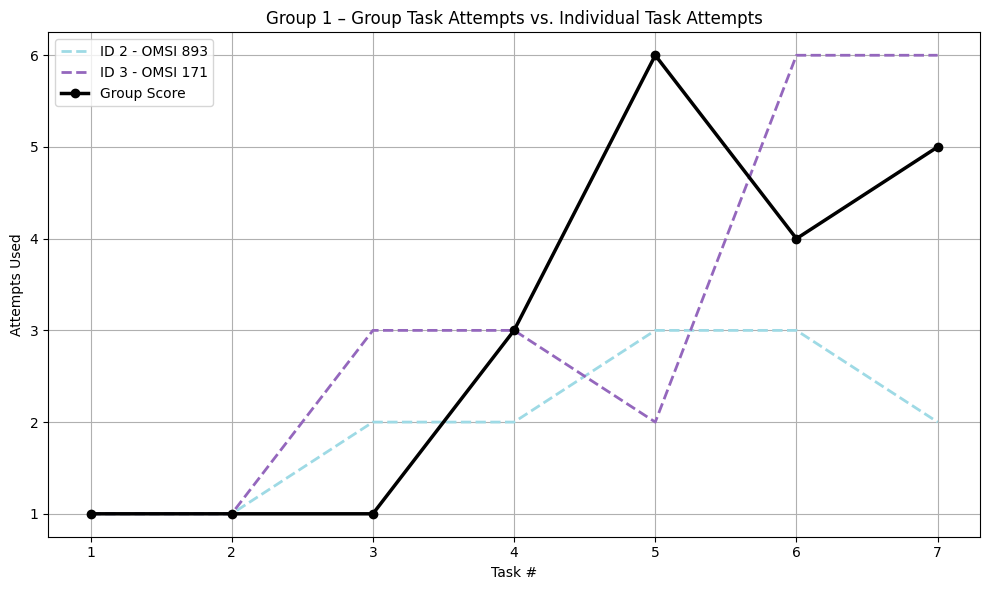

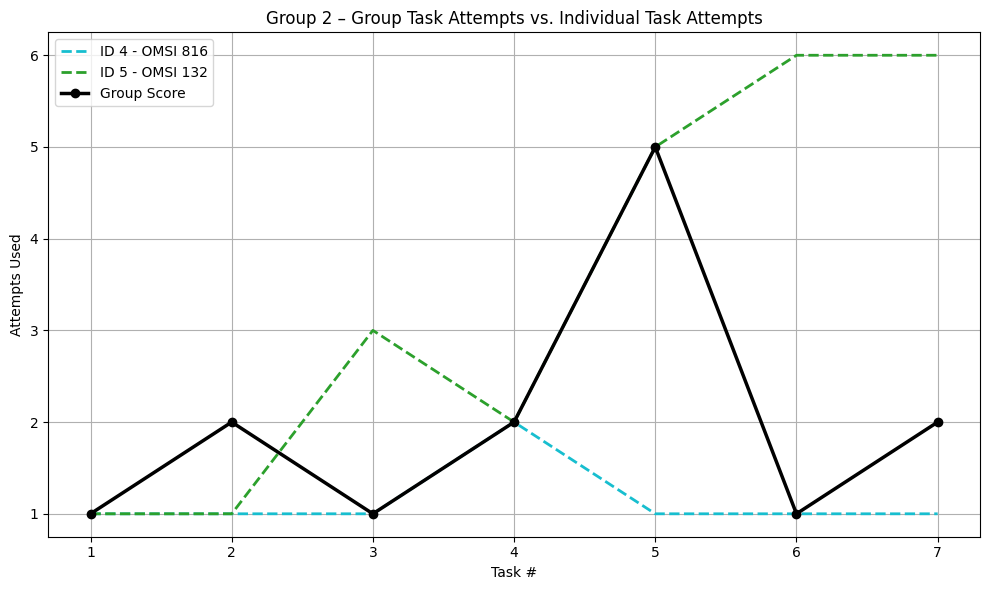

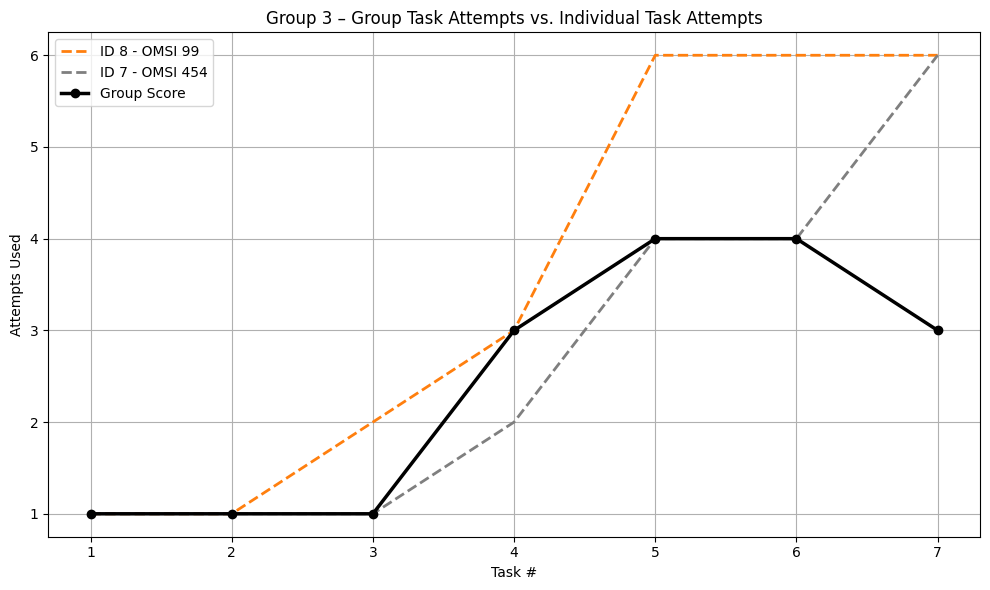

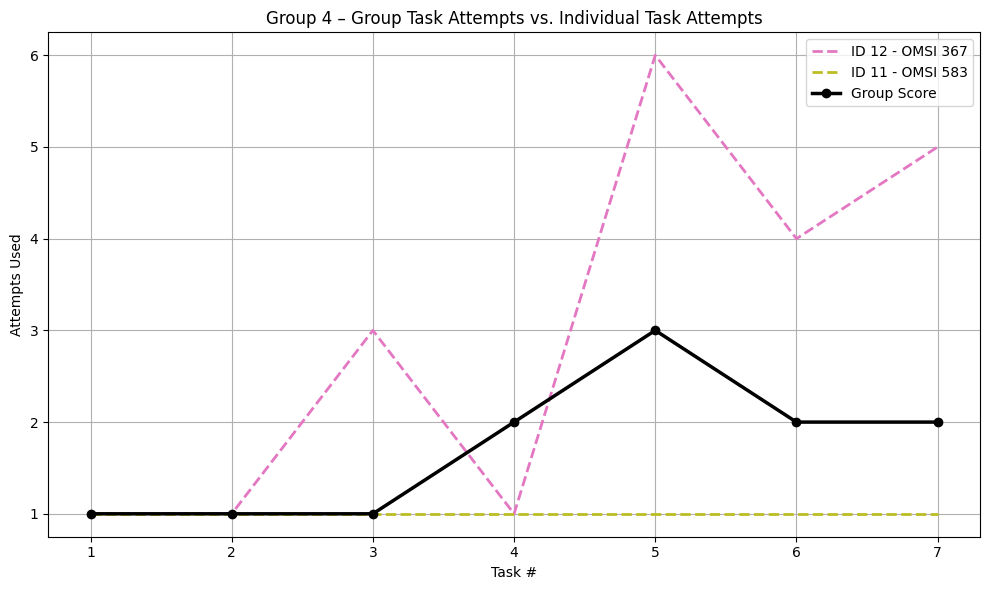

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

x = [1, 2, 3, 4, 5, 6, 7]

# Get unique group IDs from column 3
group_ids = data_beforequestionnaire.iloc[:, 3].unique()
data_beforequestionnaire.loc[data_beforequestionnaire['Task 5'] == 0, 'Task 5'] = 6

# Get unique OMSI scores from data_beforequestionnaire and sort them in ascending order
omsi_scores = np.sort(data_beforequestionnaire.iloc[:, 7].unique())

# Create a color map for OMSI scores based on ascending order
num_colors = len(omsi_scores)
color_map = cm.get_cmap("tab20", num_colors)
omsi_color_dict = {omsi_score: color_map(i) for i, omsi_score in enumerate(omsi_scores)}

# For each group
for group_id in group_ids:
    # Get all rows for the current group
    group_rows = data_beforequestionnaire[data_beforequestionnaire.iloc[:, 3] == group_id]

    # Get all subject IDs in this group
    group_subjects = group_rows.iloc[:, 2].unique()

    # Collect follow-up scores for all subjects in the group
    group_followup_scores = []

    for subject in group_subjects:
        subject_followup_rows = data_followup[data_followup.iloc[:, 0] == subject]
        followup_values = subject_followup_rows.iloc[:, 1:8].to_numpy()
        if followup_values.size > 0:
            group_followup_scores.append(followup_values)

    if not group_followup_scores or group_rows.empty:
        continue  # Skip if no data

    # Get the group score from the first row of this group
    group_score = group_rows.iloc[0, 8:15].to_numpy()

    # Start plot
    plt.figure(figsize=(10, 6))

    # Plot each subject's follow-up scores
    for subject in group_subjects:
        subject_followup_rows = data_followup[data_followup.iloc[:, 0] == subject]
        followup_values = subject_followup_rows.iloc[:, 1:8].to_numpy()

        subject_omsi_row = group_rows[group_rows.iloc[:, 2] == subject]
        if not subject_omsi_row.empty:
            omsi_score = subject_omsi_row.iloc[0, 7]
        else:
            omsi_score = "N/A"

        subject_color = omsi_color_dict.get(omsi_score, "gray")

        for row in followup_values:
            label = f'ID {subject} - OMSI {omsi_score}'
            plt.plot(x, row, linestyle='--', alpha=1, color=subject_color, linewidth=2, label=label)

    # Plot the group's own score
    plt.plot(x, group_score, marker='o', color='black', linewidth=2.5, label='Group Score')

    # Remove duplicate legend entries
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())

    # Decorate and save
    plt.xlabel("Task #")
    plt.ylabel("Attempts Used")
    plt.title(f"Group {group_id} – Group Task Attempts vs. Individual Task Attempts")
    plt.grid(True)
    plt.tight_layout()
    # plt.savefig(f"group{str(group_id)}scores.png") # uncomment to download the graphs
    plt.show()
